-->Data-driven decision making is the practice of making informed business decisions based on objective analysis and    interpretation of data.

-->It involves collecting, organizing, and analyzing relevant data to gain insights and guide decision-making processes. Several factors are driving the increasing adoption of data-driven decision making

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt
import matplotlib
import matplotlib.pyplot as plt

In [2]:
#read the covid-19 dataset
df = pd.read_csv('covid_data.csv')
df.head()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa


In [3]:
df.shape

(187, 15)

In [4]:
df.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [5]:
df.isnull()

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
184,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
185,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [7]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [8]:
df.describe()

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
count,1.870000e+02,187.000000,1.870000e+02,1.870000e+02,187.000000,187.000000,187.000000,187.000000,187.000000,187.00,1.870000e+02,187.000000,187.000000
mean,8.813094e+04,3497.518717,5.063148e+04,3.400194e+04,1222.957219,28.957219,933.812834,3.019519,64.820535,inf,7.868248e+04,9448.459893,13.606203
std,3.833187e+05,14100.002482,1.901882e+05,2.133262e+05,5710.374790,120.037173,4197.719635,3.454302,26.287694,NaN,3.382737e+05,47491.127684,24.509838
min,1.000000e+01,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000e+01,-47.000000,-3.840000
25%,1.114000e+03,18.500000,6.265000e+02,1.415000e+02,4.000000,0.000000,0.000000,0.945000,48.770000,1.45,1.051500e+03,49.000000,2.775000
50%,5.059000e+03,108.000000,2.815000e+03,1.600000e+03,49.000000,1.000000,22.000000,2.150000,71.320000,3.62,5.020000e+03,432.000000,6.890000
75%,4.046050e+04,734.000000,2.260600e+04,9.149000e+03,419.500000,6.000000,221.000000,3.875000,86.885000,6.44,3.708050e+04,3172.000000,16.855000
max,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06,56336.000000,1076.000000,33728.000000,28.560000,100.000000,inf,3.834677e+06,455582.000000,226.320000


<Axes: >

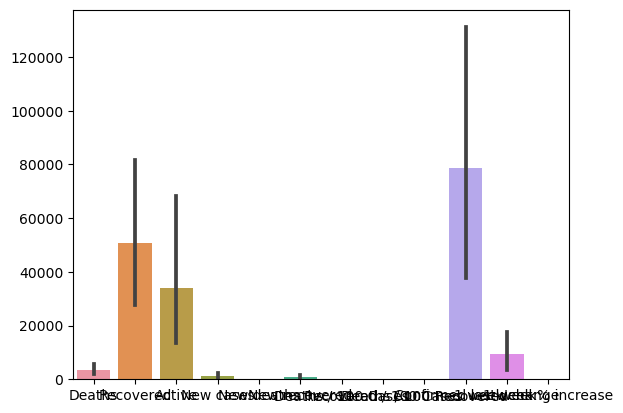

In [41]:
sns.barplot(df)

In [42]:
df.corr()

,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase
Deaths,1,1,1,1,1,1,0,-0,0,1,1,-0
Recovered,1,1,1,1,1,1,0,0,-0,1,1,-0
Active,1,1,1,1,1,1,0,-0,0,1,1,-0
New cases,1,1,1,1,1,1,0,-0,-0,1,1,0
New deaths,1,1,1,1,1,1,0,-0,-0,1,1,0
New recovered,1,1,1,1,1,1,0,-0,-0,1,1,0
Deaths / 100 Cases,0,0,0,0,0,0,1,-0,0,0,0,-0
Recovered / 100 Cases,-0,0,-0,-0,-0,-0,-0,1,-0,-0,-0,-0
Deaths / 100 Recovered,0,-0,0,-0,-0,-0,0,-0,1,0,-0,-0
Confirmed last week,1,1,1,1,1,1,0,-0,0,1,1,-0


Text(0.5, 1.0, 'covid-19 Predictions')

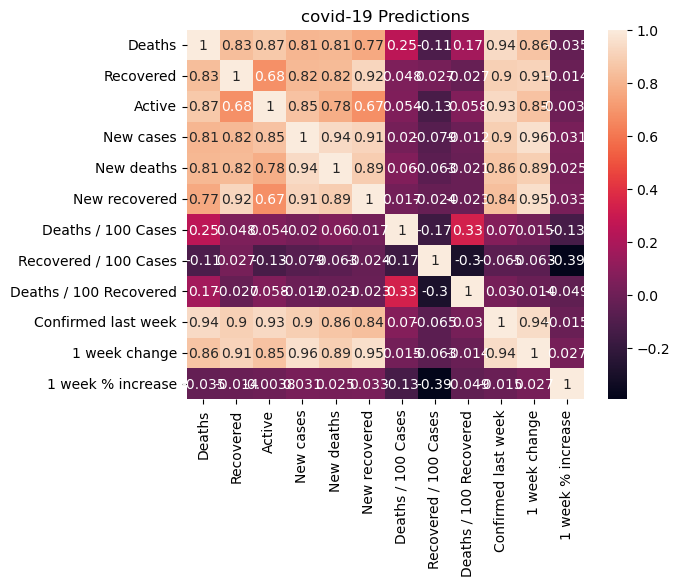

In [46]:
sns.heatmap(df.corr(),annot =True)
plt.title('covid-19 Predictions')

In [9]:
#we prefer Standard Scaler as we want data to be normallay distributed
from sklearn.preprocessing import StandardScaler

In [10]:
#call the function
scaler = StandardScaler()

In [11]:
new_df = pd.concat([df],axis='columns')
new_df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [12]:
df["Confirmed"] = pd.to_datetime(df["Confirmed"])

In [13]:
#Grouping differnent types of cases as per the date
datewise = df.groupby(["Confirmed"]).agg({"Active":"sum","Recovered":"sum","Deaths":"sum"})


In [14]:
print("Basic Information")
print("Total number of Active cases around the world",datewise["Active"].iloc[-1])
print("Total number of Recovered cases around the world",datewise["Recovered"].iloc[-1])
print("Total number of Death cases around the world",datewise["Deaths"].iloc[-1])
print("Total number of Active cases around the world",(datewise["Active"].iloc[-1]-datewise["Recovered"].iloc[-1]-datewise["Deaths"].iloc[-1]))
print("Total number of Closed cases around the world",(datewise["Recovered"].iloc[-1]+datewise["Deaths"].iloc[-1]))


Basic Information
Total number of Active cases around the world 2816444
Total number of Recovered cases around the world 1325804
Total number of Death cases around the world 148011
Total number of Active cases around the world 1342629
Total number of Closed cases around the world 1473815


# Let's visualizations of matplotlib  COVID-19 cases

(array([0]), [Text(0, 0, '1970-01-01')])

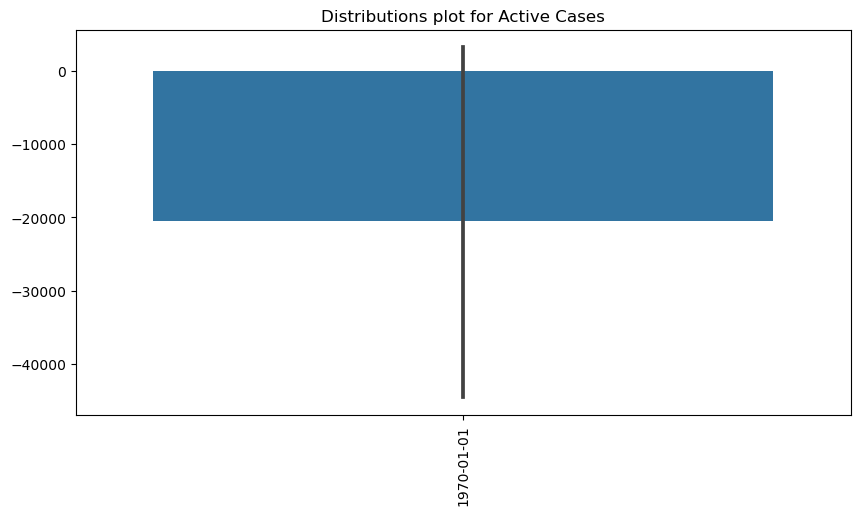

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x=datewise.index.date,y=datewise["Active"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distributions plot for Active Cases")
plt.xticks(rotation=90)

(array([0]), [Text(0, 0, '1970-01-01')])

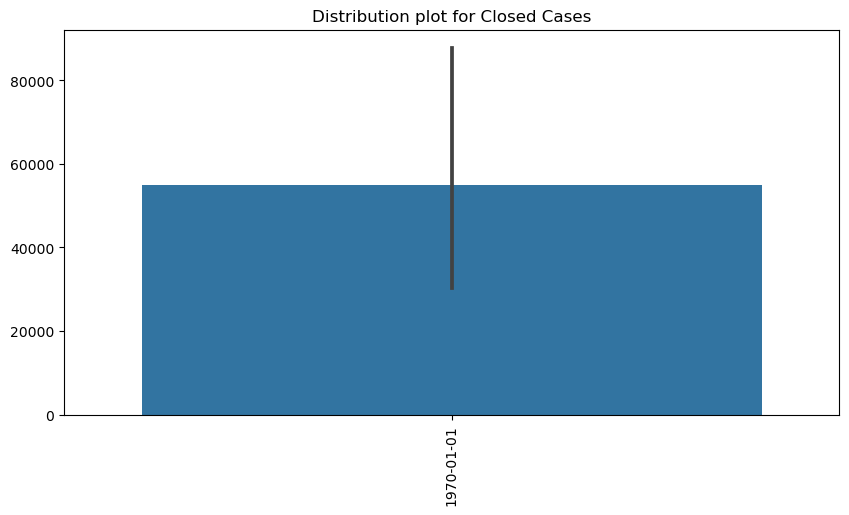

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x=datewise.index.date,y=datewise["Recovered"]+datewise["Deaths"])
plt.title("Distribution plot for Closed Cases")
plt.xticks(rotation=90)

C:\Users\HP\AppData\Local\Temp\ipykernel_19320\6246507.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  datewise["WeekofYear"] = datewise.index.weekofyear


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

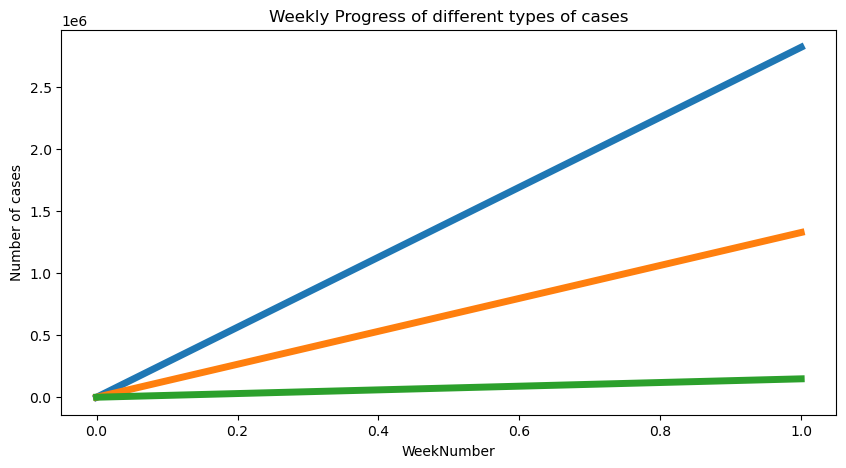

In [17]:
datewise["WeekofYear"] = datewise.index.weekofyear
week_num = [0]
weekwise_Active = [0]
weekwise_recovered = [0]
weekwise_deaths = [0]
w = 1
for i in list(datewise["WeekofYear"].unique()):
    weekwise_Active.append(datewise[datewise["WeekofYear"]==i]["Active"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekofYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num.append(w)
    w=w+1
plt.figure(figsize=(10,5))
plt.plot(week_num,weekwise_Active,linewidth=5)
plt.plot(week_num,weekwise_recovered,linewidth =5)
plt.plot(week_num,weekwise_deaths,linewidth = 5)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

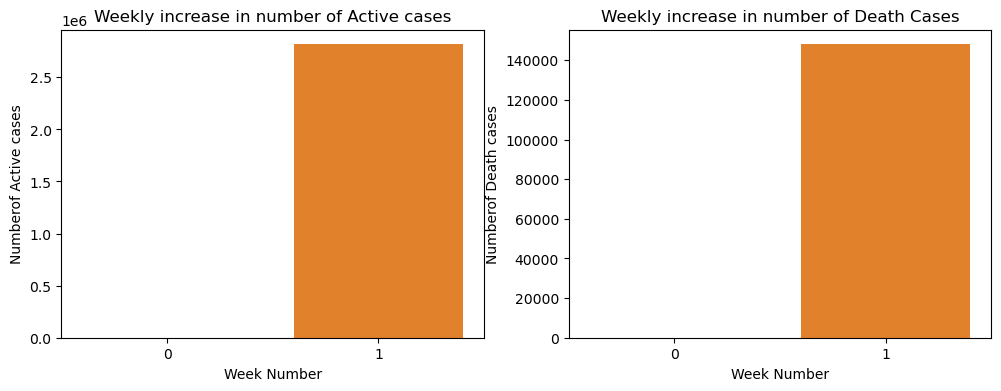

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
sns.barplot(x= week_num,y=pd.Series(weekwise_Active).diff().fillna(0),ax=ax1)
sns.barplot(x= week_num,y=pd.Series(weekwise_deaths).diff().fillna(0),ax=ax2)
ax1.set_xlabel("Week Number")
ax2.set_xlabel("Week Number")
ax1.set_ylabel("Numberof Active cases")
ax2.set_ylabel("Numberof Death cases")
ax1.set_title("Weekly increase in number of Active cases")
ax2.set_title("Weekly increase in number of Death Cases")
plt.show()

Average increase in number of Active cases everyday: 15307.0
Average increase in number of Recovered cases everyday: 7205.0
Average increase in number of Death cases everyday: 804.0


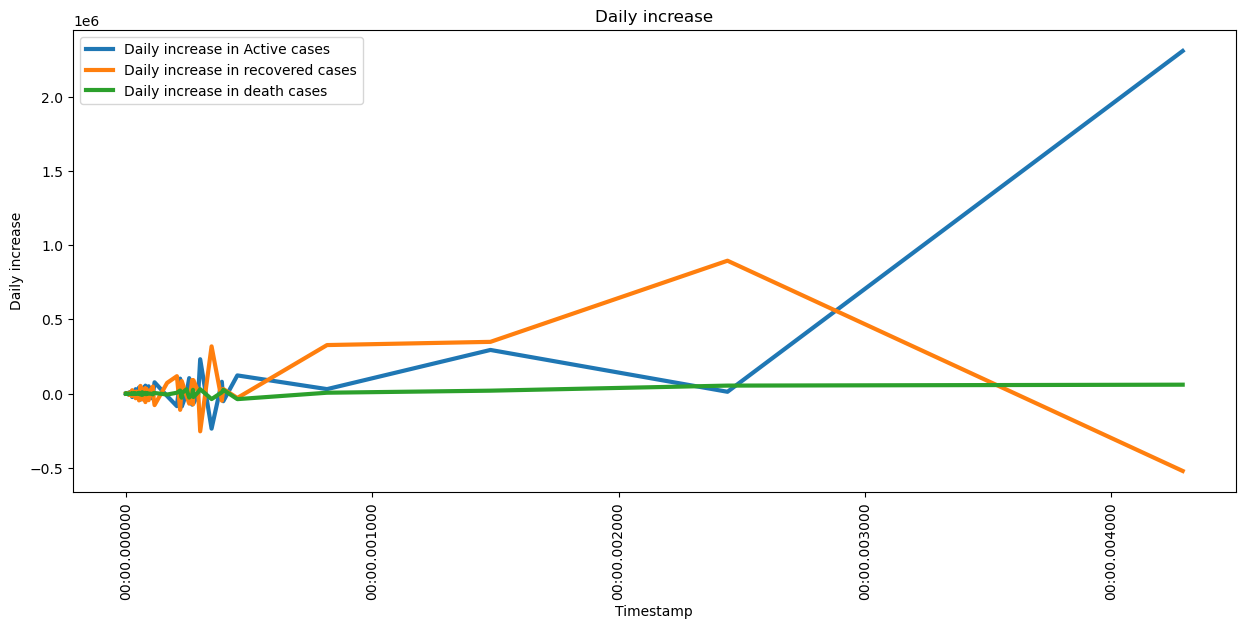

In [19]:
print("Average increase in number of Active cases everyday:",np.round(datewise["Active"].diff().fillna(0).mean()))
print("Average increase in number of Recovered cases everyday:",np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Death cases everyday:",np.round(datewise["Deaths"].diff().fillna(0).mean()))

plt.figure(figsize=(15,6))
plt.plot(datewise["Active"].diff().fillna(0),label="Daily increase in Active cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in recovered cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in death cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily increase")
plt.title("Daily increase")
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [20]:
#Country wise analysis
#Calculating Country wise Mortality rate
countrywise= df[df["Confirmed"]==df["Confirmed"].max()].groupby(["Country/Region"]).agg({"Active":"sum","Recovered":"sum","Deaths":"sum"}).sort_values(["Active"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Recovered"])*100
countrywise["Recovered"]=(countrywise["Recovered"]/countrywise["Active"])*100

Text(0.5, 1.0, 'Top 15 countries as per number of death cases')

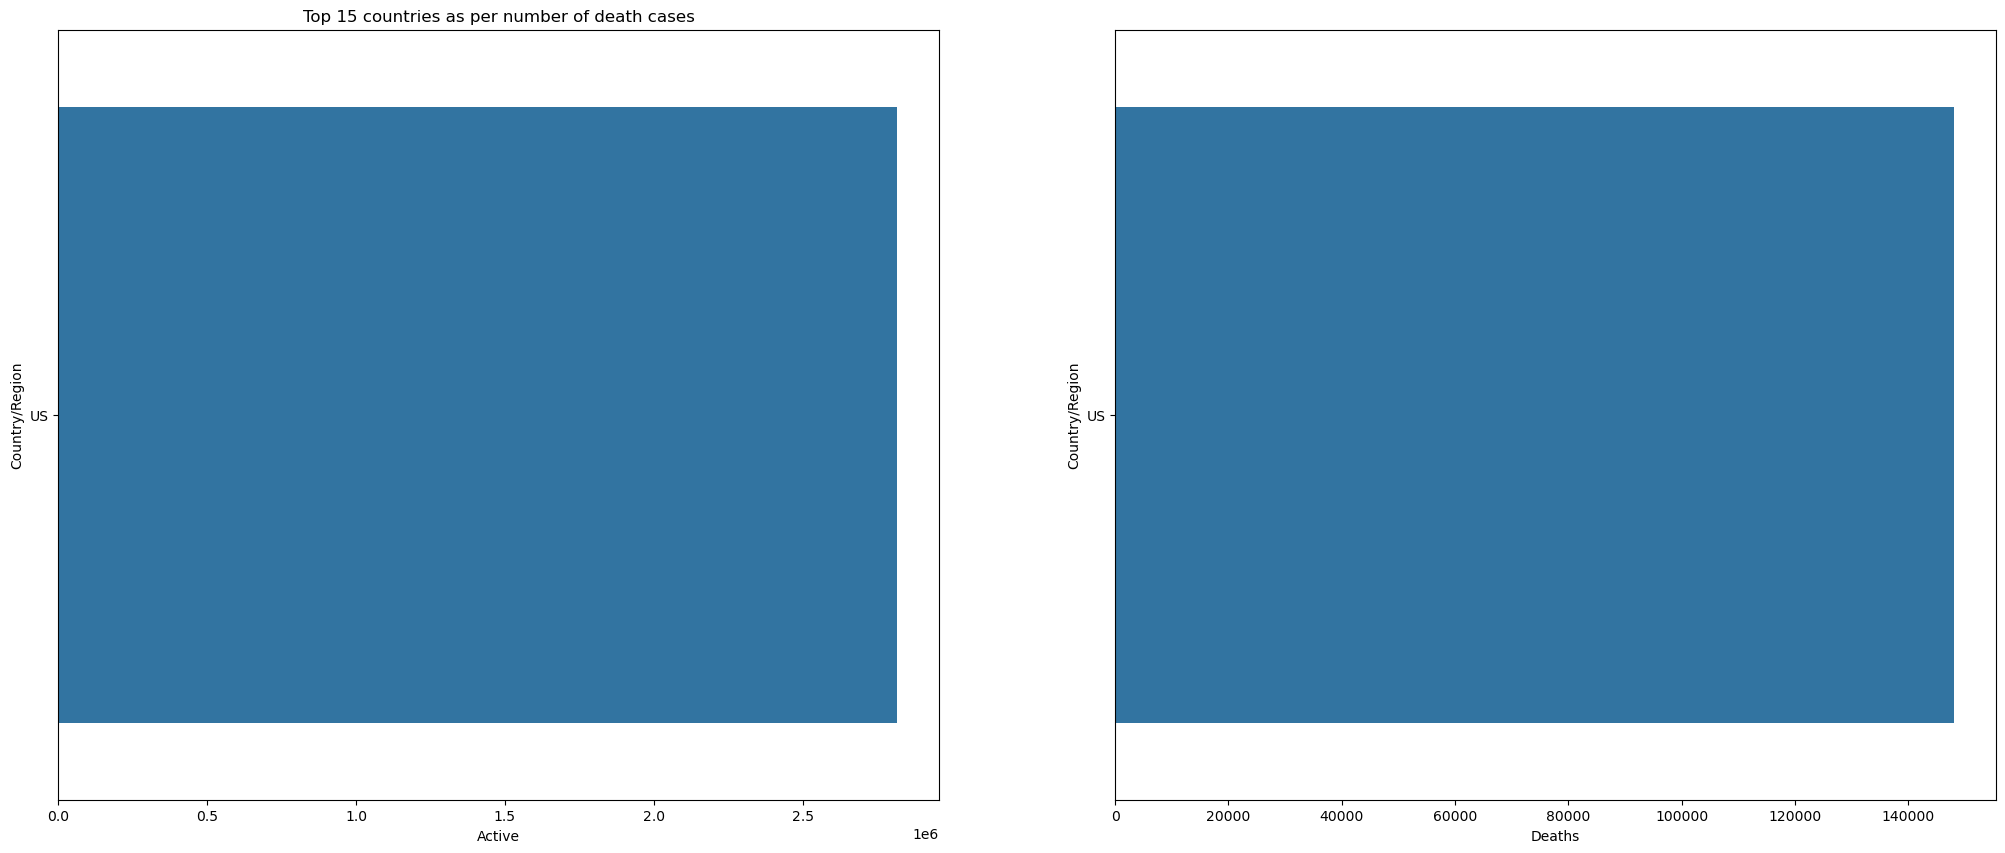

In [21]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
top_15Active = countrywise.sort_values(["Active"],ascending=False).head(15)
top_15deaths = countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15Active["Active"],y=top_15Active.index,ax=ax1)
ax1.set_title("Top 15 countries as per number of Active cases")
sns.barplot(x=top_15deaths["Deaths"],y=top_15deaths.index,ax=ax2)
ax1.set_title("Top 15 countries as per number of death cases")

In [22]:
#Data Anlaysis for India
india_data = df[df["Country/Region"]=="India"]
datewise_india = india_data.groupby(["Confirmed"]).agg({"Active":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_india.iloc[-1])
print("Total Active Cases",datewise_india["Active"].iloc[-1]-datewise_india["Recovered"].iloc[-1]-datewise_india["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_india["Recovered"].iloc[-1]+datewise_india["Deaths"].iloc[-1])

Active       495499
Recovered    951166
Deaths        33408
Name: 1970-01-01 00:00:00.001480073, dtype: int64
Total Active Cases -489075
Total Closed Cases 984574


In [23]:
#Data Anlaysis for US
us_data = df[df["Country/Region"]=="US"]
datewise_us = us_data.groupby(["Confirmed"]).agg({"Active":"sum","Recovered":"sum","Deaths":"sum"})
print(datewise_us.iloc[-1])
print("Total Active Cases",datewise_us["Active"].iloc[-1]-datewise_us["Recovered"].iloc[-1]-datewise_us["Deaths"].iloc[-1])
print("Total Closed Cases",datewise_us["Recovered"].iloc[-1]+datewise_us["Deaths"].iloc[-1])

Active       2816444
Recovered    1325804
Deaths        148011
Name: 1970-01-01 00:00:00.004290259, dtype: int64
Total Active Cases 1342629
Total Closed Cases 1473815


C:\Users\HP\AppData\Local\Temp\ipykernel_19320\2587809296.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  datewise_india["WeekofYear"] = datewise_india.index.weekofyear


Text(0.5, 1.0, 'Weekly Progress of different types of cases')

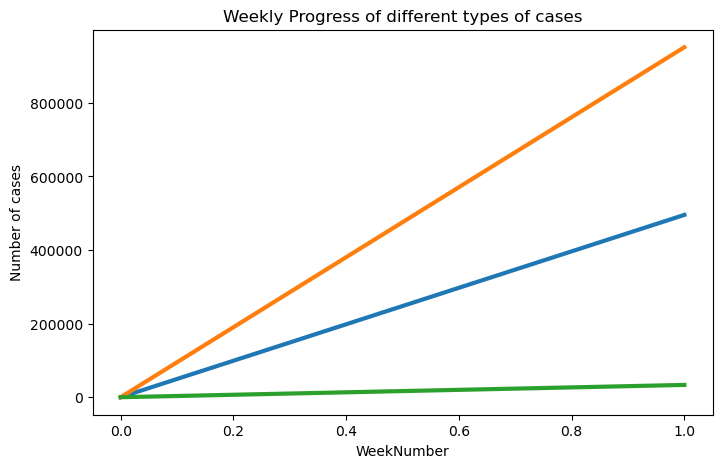

In [24]:
datewise_india["WeekofYear"] = datewise_india.index.weekofyear
week_num_india = [0]
india_weekwise_Active = [100]
india_weekwise_recovered = [25]
india_weekwise_deaths = [15]
w = 1
for i in list(datewise_india["WeekofYear"].unique()):
    india_weekwise_Active.append(datewise_india[datewise_india["WeekofYear"]==i]["Active"].iloc[-1])
    india_weekwise_recovered.append(datewise_india[datewise_india["WeekofYear"]==i]["Recovered"].iloc[-1])
    india_weekwise_deaths.append(datewise_india[datewise_india["WeekofYear"]==i]["Deaths"].iloc[-1])
    week_num_india.append(w)
    w=w+1
plt.figure(figsize=(8,5))
plt.plot(week_num_india,india_weekwise_Active,linewidth=3)
plt.plot(week_num_india,india_weekwise_recovered,linewidth =3)
plt.plot(week_num_india,india_weekwise_deaths,linewidth = 3)
plt.xlabel("WeekNumber")
plt.ylabel("Number of cases")
plt.title("Weekly Progress of different types of cases")

In [25]:
max_ind = datewise_india["Active"].max()
china_data = df[df["Country/Region"]=="Mainland China"]
Italy_data = df[df["Country/Region"]=="Italy"]
US_data = df[df["Country/Region"]=="US"]
spain_data = df[df["Country/Region"]=="Spain"]
datewise_china = china_data.groupby(["Confirmed"]).agg({"Active":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Italy = Italy_data.groupby(["Confirmed"]).agg({"Active":"sum","Recovered":"sum","Deaths":"sum"})
datewise_US=US_data.groupby(["Confirmed"]).agg({"Active":"sum","Recovered":"sum","Deaths":"sum"})
datewise_Spain=spain_data.groupby(["Confirmed"]).agg({"Active":"sum","Recovered":"sum","Deaths":"sum"})
print("It took",datewise_india[datewise_india["Active"]>0].shape[0],"days in India to reach",max_ind,"Confirmed Cases")
print("It took",datewise_Italy[(datewise_Italy["Active"]>0)&(datewise_Italy["Active"]<=max_ind)].shape[0],"days in Italy to reach number of Confirmed Cases")
print("It took",datewise_US[(datewise_US["Active"]>0)&(datewise_US["Active"]<=max_ind)].shape[0],"days in US to reach number of Confirmed Cases")
print("It took",datewise_Spain[(datewise_Spain["Active"]>0)&(datewise_Spain["Active"]<=max_ind)].shape[0],"days in Spain to reach number of Confirmed Cases")
print("It took",datewise_china[(datewise_china["Active"]>0)&(datewise_china["Active"]<=max_ind)].shape[0],"days in China to reach number of Confirmed Cases")

It took 1 days in India to reach 495499 Confirmed Cases
It took 1 days in Italy to reach number of Confirmed Cases
It took 0 days in US to reach number of Confirmed Cases
It took 1 days in Spain to reach number of Confirmed Cases
It took 0 days in China to reach number of Confirmed Cases


In [26]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"] = datewise["Days Since"].dt.days
train_ml = datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml = datewise.iloc[:int(datewise.shape[0]*0.95):]
model_scores=[]

# Building the Model
prediction of covid-19 cases to use LinearRegression

In [27]:
import warnings 
warnings.filterwarnings('ignore')

In [28]:
lin_reg = LinearRegression(normalize=True)
svm = SVR(C=1,degree=5,kernel='poly',epsilon=0.001)
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Active"]).reshape(-1,1))
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Active"]).reshape(-1,1))

SVR(C=1, degree=5, epsilon=0.001, kernel='poly')

In [29]:
prediction_valid_lin_reg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))
prediction_valid_svm = svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [30]:
new_date = []
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
  new_date.append(datewise.index[-1]+timedelta(days=i))
  new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
  new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])
pd.set_option("display.float_format",lambda x: '%.f' % x)
model_predictions=pd.DataFrame(zip(new_date,new_prediction_lr,new_prediction_svm),columns = ["Dates","LR","SVR"])
model_predictions.head(5)

,Dates,LR,SVR
0,1970-01-02 00:00:00.004290259,9911,1480
1,1970-01-03 00:00:00.004290259,9911,1480
2,1970-01-04 00:00:00.004290259,9911,1480
3,1970-01-05 00:00:00.004290259,9911,1480
4,1970-01-06 00:00:00.004290259,9911,1480


This not exact values of prediction and we implement anthor Model

Holts Linear Model Prediction to exact value predictor and to use mosel_train datawaise

In [31]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.85)]
valid=datewise.iloc[int(datewise.shape[0]*0.85):]

In [32]:
holt=Holt(np.asarray(model_train["Active"])).fit(smoothing_level=1.4,smoothing_slope=0.2)
y_pred = valid.copy()
y_pred["Holt"]=holt.forecast(len(valid))

In [33]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
   holt_new_date.append(datewise.index[-1]+timedelta(days=i))
   holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])

model_predictions["Holts Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Dates,LR,SVR,Holts Linear Model Prediction
0,1970-01-02 00:00:00.004290259,9911,1480,-178050
1,1970-01-03 00:00:00.004290259,9911,1480,-184454
2,1970-01-04 00:00:00.004290259,9911,1480,-190858
3,1970-01-05 00:00:00.004290259,9911,1480,-197261
4,1970-01-06 00:00:00.004290259,9911,1480,-203665
